In [1]:
import torch, sys
sys.path.append('..')
from SAM import datasets, utils, SEED
from config import config
from matplotlib import pyplot as plt

torch.set_printoptions(linewidth=1000, threshold=1000, precision=6)

d = 1
n_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
k_nearest = [5, 10, 15, 20]

# d = 3
# n_list = [4,8,12,16,20]
# k_nearest = [5,10,15,20]

V_list = [[0]*len(n_list)]*len(k_nearest)
Veq_list = [[0]*len(n_list)]*len(k_nearest)


k_nearest= 5
k_nearest= 10
k_nearest= 15
k_nearest= 20


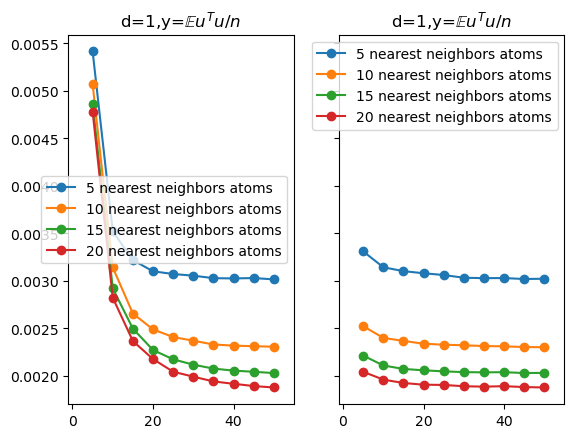

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
cfg = config.load_config('../config/params3.yml')

for j in range(len(k_nearest)):
    print("k_nearest=", k_nearest[j])
    for i in range(len(n_list)):
        cfg.model.k_near = k_nearest[j]
        cfg.data.n_sam_per_dim = n_list[i]
        cfg.data.n_all_per_dim = n_list[i]
        config.check_config(cfg, save_cfg=False, check_path=False)
        dataset = datasets.get_dataset(cfg)
        potential_fn = utils.get_potential_fn(cfg)
        V_list[j][i] = potential_fn(dataset.x_sam, dataset.mean).item()

        cfg.data.n_all_per_dim = n_list[-1]
        config.check_config(cfg, save_cfg=False, check_path=False)
        dataset = datasets.get_pdc_dataset(cfg)
        Veq_list[j][i] = potential_fn(dataset.x_all, dataset.mean).item()

    axes[0].plot(n_list, V_list[j], marker='o',
                 label=f"{k_nearest[j]} nearest neighbors atoms")
    axes[1].plot(n_list, Veq_list[j], marker='o',
                 label=f"{k_nearest[j]} nearest neighbors atoms")

axes[0].set_title(f'd={d},y='r'$\mathbb{E}u^{T}u/n$')
axes[0].legend()
axes[0].set_xlim([-1, 55])
axes[1].set_title(f'd={d},y='r'$\mathbb{E}u^{T}u/n$')
axes[1].legend()
plt.show()